<a href="https://colab.research.google.com/github/mayankmnitj/UcConvoNet/blob/main/Final_code_UcConvoNet_on_LFs_of_McIntire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy tensorflow scikit-learn openpyxl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --upgrade --force-reinstall gensim numpy

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp

In [3]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Load dataset
data = pd.read_csv(r'/content/drive/MyDrive/UcConvoNet Model/Mcintire_DataSet.csv', header=0)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
data=data[['text','label']].dropna()

In [5]:
data.shape

(6335, 2)

In [6]:


# Initialize stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase text
    text = text.lower()

    # Remove URLs & Email Addresses
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)

    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords & apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing
data['clean_text'] = data['text'].astype(str).apply(preprocess_text)

# Tokenize sentences into word lists
tokenized_sentences = [sentence.split() for sentence in data['clean_text'].tolist()]

# Display sample
print(data[['text', 'clean_text']].head())


                                                text  \
0  Daniel Greenfield, a Shillman Journalism Fello...   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...   
2  U.S. Secretary of State John F. Kerry said Mon...   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...   
4  It's primary day in New York and front-runners...   

                                          clean_text  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  u secretary state john f kerry said monday sto...  
3  kaydee king november lesson tonight dem loss t...  
4  primary day new york frontrunners hillary clin...  


In [8]:
## Step 3: Generate Word Embeddings
import numpy as np

# =============================
#data = pd.read_csv(r'/content/drive/MyDrive/Ph.D/Mcintire_DataSet.csv', header=0)
#text_data = data['text'].astype(str).tolist()  # Convert to list of strings
#tokenized_sentences = [sentence.split() for sentence in text_data]
from gensim.models import Word2Vec
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Generate word embeddings for each text entry
word_embeddings = np.array([
    np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(100)], axis=0)
    for sentence in tokenized_sentences
])

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data1 = pd.read_excel(r'/content/drive/MyDrive/UcConvoNet Model/LFs of Datasets/arrays_Mcintire.xlsx', header=0)

In [10]:
data1=data1.iloc[:, :-1]

In [11]:
data1

,stop_word_count,Text polarity,Subjectivity,capital letters,#letter,#digit,#quoted content,Urls:,flesch_reading_ease,smog_index,...,#!,#?,#...,#.#,average char per word,Content Words,noun,verb,adjective,adverb
0,588,0.054142,0.576737,314,6042,6,0,0,56.49,12.1,...,0,3,85,0,4.0,370,195,25,104,46
1,192,0.077074,0.502593,96,2101,24,0,1,64.64,12.5,...,0,0,28,0,4.0,159,84,9,40,26
2,181,0.102574,0.348775,96,2065,4,0,0,36.19,16.2,...,0,0,24,0,4.0,154,90,6,48,10
3,136,0.063645,0.503563,138,2110,61,3,1,34.22,17.2,...,1,0,17,0,4.0,155,75,10,51,19
4,126,0.251709,0.420109,77,1458,8,21,0,52.67,14.2,...,2,0,21,0,4.0,81,38,9,20,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,231,0.027823,0.342823,148,3292,30,37,0,39.44,16.4,...,1,0,30,0,4.0,162,101,9,37,15
6331,826,0.042616,0.432589,475,11586,74,0,0,0.09,23.5,...,0,1,143,0,4.0,783,409,59,253,62
6332,821,0.017563,0.369175,434,9832,17,1,0,60.95,12.3,...,0,6,103,0,4.0,483,263,37,139,44
6333,429,0.080076,0.380197,234,5644,53,5,0,4.11,21.3,...,0,0,66,0,4.0,359,211,18,101,29


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
sc = StandardScaler()
data1 = sc.fit_transform(data1)

In [24]:
# Step 4: Concatenate Features and Embeddings
# =============================
X = np.concatenate((data1, word_embeddings), axis=1)

In [25]:
X.shape

(6335, 180)


===== Fold 1 =====
Logistic Regression - Accuracy: 0.8674, Precision: 0.8444, Recall: 0.9005, F1-Score: 0.8716


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Accuracy: 0.8840, Precision: 0.8432, Recall: 0.9431, F1-Score: 0.8904
K-Nearest Neighbors (KNN) - Accuracy: 0.7735, Precision: 0.7755, Recall: 0.7694, F1-Score: 0.7724
Naïve Bayes - Accuracy: 0.6740, Precision: 0.7973, Recall: 0.4660, F1-Score: 0.5882
AdaBoost - Accuracy: 0.8406, Precision: 0.8241, Recall: 0.8657, F1-Score: 0.8444

===== Fold 2 =====


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.8729, Precision: 0.8522, Recall: 0.9021, F1-Score: 0.8764
Random Forest - Accuracy: 0.9061, Precision: 0.8847, Recall: 0.9336, F1-Score: 0.9085
K-Nearest Neighbors (KNN) - Accuracy: 0.7774, Precision: 0.8063, Recall: 0.7299, F1-Score: 0.7662
Naïve Bayes - Accuracy: 0.6361, Precision: 0.7471, Recall: 0.4107, F1-Score: 0.5301
AdaBoost - Accuracy: 0.8603, Precision: 0.8585, Recall: 0.8626, F1-Score: 0.8605

===== Fold 3 =====
Logistic Regression - Accuracy: 0.8777, Precision: 0.8666, Recall: 0.8926, F1-Score: 0.8794


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Accuracy: 0.9069, Precision: 0.8884, Recall: 0.9305, F1-Score: 0.9090
K-Nearest Neighbors (KNN) - Accuracy: 0.7972, Precision: 0.8456, Recall: 0.7267, F1-Score: 0.7816
Naïve Bayes - Accuracy: 0.6156, Precision: 0.7626, Recall: 0.3349, F1-Score: 0.4654
AdaBoost - Accuracy: 0.8500, Precision: 0.8499, Recall: 0.8499, F1-Score: 0.8499

===== Fold 4 =====
Logistic Regression - Accuracy: 0.8903, Precision: 0.8921, Recall: 0.8878, F1-Score: 0.8899


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Accuracy: 0.9037, Precision: 0.8925, Recall: 0.9179, F1-Score: 0.9050
K-Nearest Neighbors (KNN) - Accuracy: 0.7908, Precision: 0.8286, Recall: 0.7330, F1-Score: 0.7779
Naïve Bayes - Accuracy: 0.6219, Precision: 0.7601, Recall: 0.3555, F1-Score: 0.4844
AdaBoost - Accuracy: 0.8516, Precision: 0.8571, Recall: 0.8436, F1-Score: 0.8503

===== Fold 5 =====
Logistic Regression - Accuracy: 0.8729, Precision: 0.8541, Recall: 0.8987, F1-Score: 0.8759


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Accuracy: 0.8958, Precision: 0.8676, Recall: 0.9335, F1-Score: 0.8994
K-Nearest Neighbors (KNN) - Accuracy: 0.7893, Precision: 0.8207, Recall: 0.7389, F1-Score: 0.7777
Naïve Bayes - Accuracy: 0.6417, Precision: 0.7781, Recall: 0.3940, F1-Score: 0.5231
AdaBoost - Accuracy: 0.8303, Precision: 0.8145, Recall: 0.8544, F1-Score: 0.8340

===== Average Performance Across 5 Folds =====

Logistic Regression:
Accuracy: 0.8762, Precision: 0.8619, Recall: 0.8963, F1-Score: 0.8786

Random Forest:
Accuracy: 0.8993, Precision: 0.8753, Recall: 0.9317, F1-Score: 0.9024

K-Nearest Neighbors (KNN):
Accuracy: 0.7856, Precision: 0.8153, Recall: 0.7396, F1-Score: 0.7752

Naïve Bayes:
Accuracy: 0.6379, Precision: 0.7691, Recall: 0.3922, F1-Score: 0.5182

AdaBoost:
Accuracy: 0.8466, Precision: 0.8408, Recall: 0.8552, F1-Score: 0.8478


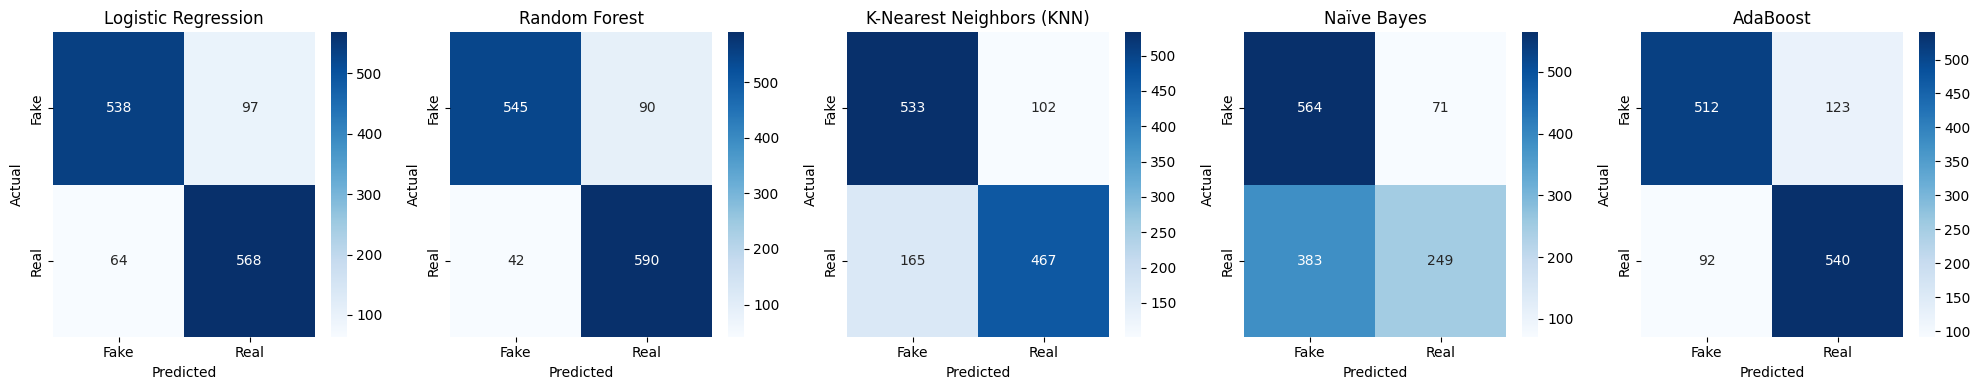

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Labels
labels = data['label'].values

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    #"SVM": SVC(kernel='linear', probability=True),
    "Naïve Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

# Store performance metrics
results = {name: {"accuracy": [], "precision": [], "recall": [], "f1": []} for name in models.keys()}
conf_matrices = {}

fold = 1
for train_idx, test_idx in kf.split(data1, labels):  #here we use only LFs so we remove X
    X_train, X_test = data1[train_idx], data1[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]

    print(f"\n===== Fold {fold} =====")

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')

        # Store metrics
        results[model_name]["accuracy"].append(accuracy)
        results[model_name]["precision"].append(precision)
        results[model_name]["recall"].append(recall)
        results[model_name]["f1"].append(f1)

        print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

        # Store last fold confusion matrix
        if fold == 5:
            conf_matrices[model_name] = confusion_matrix(y_test, y_pred)

    fold += 1

# Display overall performance
print("\n===== Average Performance Across 5 Folds =====")
for model_name in models.keys():
    print(f"\n{model_name}:")
    print(f"Accuracy: {np.mean(results[model_name]['accuracy']):.4f}, "
          f"Precision: {np.mean(results[model_name]['precision']):.4f}, "
          f"Recall: {np.mean(results[model_name]['recall']):.4f}, "
          f"F1-Score: {np.mean(results[model_name]['f1']):.4f}")

# Plot Confusion Matrices for the Last Fold
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'], ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


===== Fold 1 =====
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6594 - loss: 0.6055 - val_accuracy: 0.7766 - val_loss: 0.4624
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8113 - loss: 0.4235 - val_accuracy: 0.8327 - val_loss: 0.3907
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8408 - loss: 0.3745 - val_accuracy: 0.8161 - val_loss: 0.4182
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8618 - loss: 0.3337 - val_accuracy: 0.8571 - val_loss: 0.3498
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8850 - loss: 0.2853 - val_accuracy: 0.8508 - val_loss: 0.3439
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8972 - loss: 0.2579 - val_accuracy: 0.8564 - val_loss: 0.3385
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9103 - loss: 0.2359 - val_accuracy: 0.8721 - val_loss: 0.3041
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9183 - loss: 0.2086 - val_accuracy: 0.8840 - va

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6475 - loss: 0.6243 - val_accuracy: 0.7901 - val_loss: 0.4367
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8079 - loss: 0.4332 - val_accuracy: 0.8224 - val_loss: 0.3862
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8512 - loss: 0.3540 - val_accuracy: 0.8564 - val_loss: 0.3389
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8661 - loss: 0.3118 - val_accuracy: 0.8690 - val_loss: 0.3050
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8890 - loss: 0.2624 - val_accuracy: 0.8737 - val_loss: 0.3149
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8909 - loss: 0.2523 - val_accuracy: 0.8713 - val_loss: 0.3357
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9008 - loss: 0.2317 - val_accuracy: 0.8713 - val_loss: 0.3331
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Accuracy: 0.8690, Precision: 0.8511, Recall: 0.8942, F1-Score: 0.8721

====

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.6325 - loss: 0.6220 - val_accuracy: 0.7624 - val_loss: 0.4791
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8061 - loss: 0.4307 - val_accuracy: 0.8382 - val_loss: 0.3612
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8613 - loss: 0.3355 - val_accuracy: 0.8642 - val_loss: 0.3403
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8715 - loss: 0.3120 - val_accuracy: 0.8658 - val_loss: 0.3145
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8848 - loss: 0.2764 - val_accuracy: 0.8769 - val_loss: 0.2926
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8961 - loss: 0.2590 - val_accuracy: 0.8800 - val_loss: 0.2813
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8966 - loss: 0.2404 - val_accuracy: 0.8824 - val_loss: 0.2947
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9084 - loss: 0.2211 - val_accuracy: 0.8966 - val

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.6393 - loss: 0.6331 - val_accuracy: 0.7940 - val_loss: 0.4670
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7907 - loss: 0.4471 - val_accuracy: 0.7979 - val_loss: 0.4094
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8436 - loss: 0.3639 - val_accuracy: 0.8477 - val_loss: 0.3401
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8729 - loss: 0.3128 - val_accuracy: 0.8445 - val_loss: 0.3436
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8715 - loss: 0.2916 - val_accuracy: 0.8777 - val_loss: 0.3051
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8965 - loss: 0.2407 - val_accuracy: 0.8863 - val_loss: 0.2836
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9014 - loss: 0.2354 - val_accuracy: 0.8840 - val_loss: 0.3015
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9088 - loss: 0.2185 - val_accuracy: 0.8792 - val

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.6303 - loss: 0.6311 - val_accuracy: 0.7466 - val_loss: 0.5226
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7964 - loss: 0.4378 - val_accuracy: 0.7979 - val_loss: 0.4449
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8334 - loss: 0.3722 - val_accuracy: 0.8414 - val_loss: 0.3573
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8608 - loss: 0.3090 - val_accuracy: 0.8366 - val_loss: 0.3561
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8818 - loss: 0.2844 - val_accuracy: 0.8674 - val_loss: 0.3296
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9015 - loss: 0.2434 - val_accuracy: 0.8674 - val_loss: 0.3090
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8999 - loss: 0.2423 - val_accuracy: 0.8666 - val_loss: 0.3242
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9016 - loss: 0.2290 - val_accuracy: 0.8619 - val

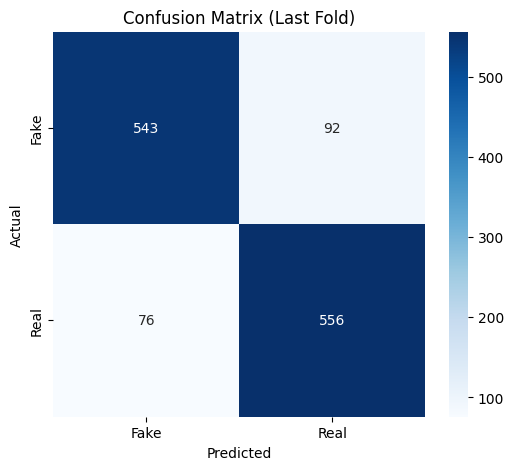

<Figure size 640x480 with 0 Axes>

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Conv1D, MaxPooling1D, Flatten, Dense

# Define UcConvoNet Model
def create_model(input_shape=(80,1), num_classes=2): #here we use only LFs features
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(2))
    model.add(Dropout(rate=0.01))
    model.add(Conv1D(64, 4, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(rate=0.01))
    model.add(Conv1D(64, 4, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(rate=0.01))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list, precision_list, recall_list, f1_list = [], [], [], []
fold = 1

for train_idx, test_idx in kf.split(data1, labels):
    print(f"\n===== Fold {fold} =====")

    X_train, X_test = data1[train_idx], data1[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]

    # Convert to TensorFlow tensor & reshape
    X_train = tf.convert_to_tensor(X_train.reshape(-1, 80, 1))
    X_test = tf.convert_to_tensor(X_test.reshape(-1, 80, 1))

    # Convert labels to categorical values
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

    # Train model
    model = create_model()
    history = model.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

    # Evaluate model
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    # Store last fold confusion matrix
    if fold == 5:
        cm = confusion_matrix(y_true, y_pred)

    fold += 1

# Print average performance across folds
print("\n===== Average Performance Across 5 Folds =====")
print(f"Accuracy: {np.mean(accuracy_list):.4f}, Precision: {np.mean(precision_list):.4f}, "
      f"Recall: {np.mean(recall_list):.4f}, F1-Score: {np.mean(f1_list):.4f}")

# Plot Confusion Matrix for the last fold
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Last Fold)")
plt.show()
plt.savefig("UcConvoNet_cm_Mcntire.pdf", dpi=600, bbox_inches='tight')  # Save as PDF

In [36]:
plt.savefig("UcConvoNet_cm_Mcntire.pdf", dpi=600, bbox_inches='tight')  # Save as PDF

<Figure size 640x480 with 0 Axes>


===== Fold 1 =====
Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7410 - loss: 0.5415 - val_accuracy: 0.8058 - val_loss: 0.4038
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8065 - loss: 0.4452 - val_accuracy: 0.8193 - val_loss: 0.3805
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - loss: 0.4479 - val_accuracy: 0.8493 - val_loss: 0.3766
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8106 - loss: 0.4555 - val_accuracy: 0.8327 - val_loss: 0.3856
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8182 - loss: 0.4468 - val_accuracy: 0.8232 - val_loss: 0.3955
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8005 - loss: 0.4460 - val_accuracy: 0.8524 - val_loss: 0.3489
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8247 - loss: 0.4174 - val_accuracy: 0.8398 - val_loss: 0.3424
Epoch 8/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8368 - loss: 0.39

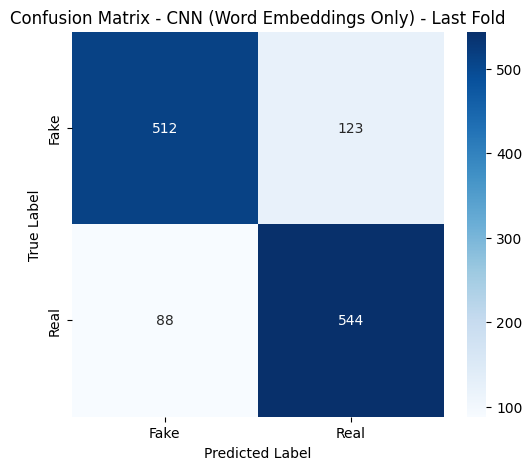

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# =============================
# Step 1: Prepare Data
# =============================

X_embeddings = np.array(data1)  # Use word embeddings only
y = np.array(labels)  # Convert target variable to NumPy array

# Reshape input for Conv1D
X_embeddings = np.expand_dims(X_embeddings, axis=-1)

# =============================
# Step 2: Define CNN Model Function
# =============================

def create_cnn_model(input_shape):
    input_layer = Input(shape=input_shape)  # Input layer
    cnn = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(input_layer)  # CNN Layer
    cnn = MaxPooling1D(pool_size=2)(cnn)  # Max pooling layer
    cnn = Flatten()(cnn)  # Flatten output
    dropout = Dropout(0.5)(cnn)  # Dropout for regularization
    output_layer = Dense(1, activation='sigmoid')(dropout)  # Output layer

    # Define Model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

    return model

# =============================
# Step 3: Perform 5-Fold Cross-Validation
# =============================

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list, precision_list, recall_list, f1_list = [], [], [], []
fold = 1

for train_idx, test_idx in kf.split(X_embeddings, y):
    print(f"\n===== Fold {fold} =====")

    X_train, X_test = X_embeddings[train_idx], X_embeddings[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train model
    model = create_cnn_model(input_shape=(X_train.shape[1], 1))
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

    # Evaluate model
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    # Store last fold confusion matrix
    if fold == 5:
        cm = confusion_matrix(y_test, y_pred)

    fold += 1

# =============================
# Step 4: Display Average Performance
# =============================

print("\n===== Average Performance Across 5 Folds =====")
print(f"Accuracy: {np.mean(accuracy_list):.4f}, Precision: {np.mean(precision_list):.4f}, "
      f"Recall: {np.mean(recall_list):.4f}, F1-Score: {np.mean(f1_list):.4f}")

# =============================
# Step 5: Plot Confusion Matrix for Last Fold
# =============================

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN (LFs Only) - Last Fold")
plt.show()


In [41]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       635
           1       0.82      0.86      0.84       632

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267




===== Fold 1 =====
Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7696 - loss: 0.4827 - val_accuracy: 0.8556 - val_loss: 0.3327
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8355 - loss: 0.3459 - val_accuracy: 0.8516 - val_loss: 0.3391
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8653 - loss: 0.3133 - val_accuracy: 0.8619 - val_loss: 0.3110
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8776 - loss: 0.2851 - val_accuracy: 0.8682 - val_loss: 0.2964
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8817 - loss: 0.2751 - val_accuracy: 0.8635 - val_loss: 0.2887
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8798 - loss: 0.2785 - val_accuracy: 0.8777 - val_loss: 0.2915
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8931 - loss: 0.2544 - val_accuracy: 0.8721 - val_loss: 0.2974
Epoch 8/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8910 - loss: 0

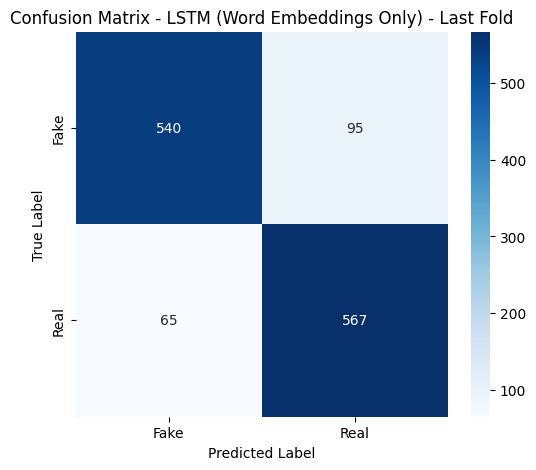

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# =============================
# Step 1: Prepare Data
# =============================

X_embeddings = np.array(data1)  # Use word embeddings only
y = np.array(labels)  # Convert target variable to NumPy array

# Reshape input for LSTM (samples, timesteps, features)
X_embeddings = np.expand_dims(X_embeddings, axis=1)

# =============================
# Step 2: Define LSTM Model Function
# =============================

def create_lstm_model(input_shape):
    input_layer = Input(shape=input_shape)  # Input layer
    lstm = LSTM(64, return_sequences=False)(input_layer)  # LSTM Layer
    dropout = Dropout(0.5)(lstm)  # Dropout for regularization
    output_layer = Dense(1, activation='sigmoid')(dropout)  # Output layer

    # Define Model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

    return model

# =============================
# Step 3: Perform 5-Fold Cross-Validation
# =============================

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list, precision_list, recall_list, f1_list = [], [], [], []
fold = 1

for train_idx, test_idx in kf.split(X_embeddings, y):
    print(f"\n===== Fold {fold} =====")

    X_train, X_test = X_embeddings[train_idx], X_embeddings[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train model
    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

    # Evaluate model
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    # Store last fold confusion matrix
    if fold == 5:
        cm = confusion_matrix(y_test, y_pred)

    fold += 1

# =============================
# Step 4: Display Average Performance
# =============================

print("\n===== Average Performance Across 5 Folds =====")
print(f"Accuracy: {np.mean(accuracy_list):.4f}, Precision: {np.mean(precision_list):.4f}, "
      f"Recall: {np.mean(recall_list):.4f}, F1-Score: {np.mean(f1_list):.4f}")

# =============================
# Step 5: Plot Confusion Matrix for Last Fold
# =============================

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LSTM (LFs Only) - Last Fold")
plt.show()


In [45]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       635
           1       0.86      0.90      0.88       632

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267

